<a href="https://colab.research.google.com/github/ygebre1/bitcoin-price-predictor/blob/trial1/prediction_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task:
To build a machine learning model, first, download Bitcoin price data and gather relevant information from Wikipedia. Next, combine these datasets to create a comprehensive dataset for analysis. Finally, use this combined data to train and develop a machine learning model.

In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
# Price of Bitcoin relative to the USD
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
# This will give us everything from when Yahoo Finance started tracking
# Bitcoin through to the present.
btc = btc_ticker.history(period="max")

Since Bitcoin trades continuously without a set open or close price, the table may appear slightly unusual. Additionally, Yahoo Finance primarily tracks stocks, which have defined trading hours, dividends, and stock splits—none of which apply to Bitcoin.

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-11 00:00:00+00:00,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.0,0.0
2025-02-12 00:00:00+00:00,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.0,0.0
2025-02-13 00:00:00+00:00,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
btc.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [7]:
del btc['Dividends']
del btc['Stock Splits']

In [8]:
btc.columns = [c.lower() for c in btc.columns]

In [9]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-02-11 00:00:00+00:00,97438.132812,98492.898438,94875.039062,95747.429688,37488783272
2025-02-12 00:00:00+00:00,95745.695312,98151.023438,94101.203125,97885.859375,49340445530
2025-02-13 00:00:00+00:00,97888.750000,98111.085938,95269.710938,96623.867188,37147280860


<Axes: xlabel='Date'>

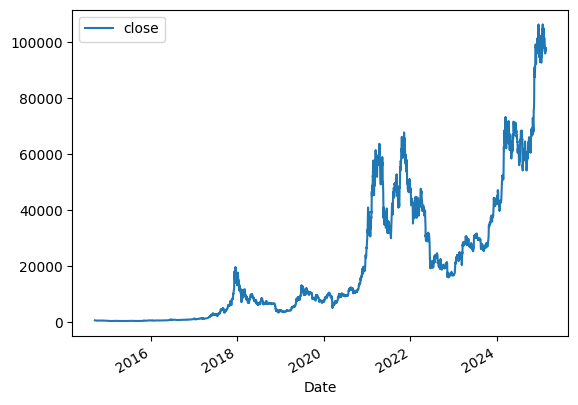

In [10]:
# By date, what did the closing price look like?
btc.plot.line(y='close', use_index=True)

In [11]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col=0, parse_dates=True)

In [12]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2025-02-12,0.433333,-0.057369,0.105556
2025-02-13,0.433333,-0.057369,0.105556
2025-02-14,0.433333,-0.057369,0.105556
2025-02-15,0.466667,-0.032432,0.105556


In [13]:
wiki.columns

Index(['edit_count', 'sentiment', 'neg_sentiment'], dtype='object')

In [14]:
btc.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [15]:
btc.index = btc.index.tz_convert(None).normalize()

In [16]:
btc

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272
2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530
2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860


In [17]:
btc = btc.merge(wiki, left_index=True, right_index=True, how='left')

In [18]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
Date,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.433333,-0.057369,0.105556
2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.433333,-0.057369,0.105556
2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,0.433333,-0.057369,0.105556


In [19]:
btc["tomorrow"] = btc["close"].shift(-1)

In [20]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.433333,-0.057369,0.105556,97885.859375
2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.433333,-0.057369,0.105556,96623.867188
2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,0.433333,-0.057369,0.105556,97508.968750


In [21]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [22]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
Date,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.433333,-0.057369,0.105556,97885.859375,1
2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.433333,-0.057369,0.105556,96623.867188,0
2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,0.433333,-0.057369,0.105556,97508.968750,1


In [23]:
# Relatively balanced
btc["target"].value_counts()

,count
target,
1,2010
0,1795


##Why?
This is time series data, so we must preserve its sequential order. Shuffling the data could break the time dependencies, which are crucial for accurate predictions in time series forecasting. So, we split the data chronologically, ensuring the model learns from past data to predict future outcomes. It’s important not to use cross-validation or other typical machine learning techniques to evaluate error, as they might create unrealistic scenarios—like using future data to predict past data (e.g., using data from 2025 to predict 2017).

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]

model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [25]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
# This is just the baseline precision score with more room for improvement
precision_score(test["target"], preds)

0.5084745762711864

In [26]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [27]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [28]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, n_estimators=200, learning_rate=0.1)
predictions = backtest(btc, model, predictors)

In [29]:
precision_score(predictions["target"], predictions["predictions"])

0.5023442732752846

In [30]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]

    return btc, new_predictors

In [31]:
btc, new_predictors = compute_rolling(btc.copy())

In [32]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,0.433333,-0.057369,0.105556,97885.859375,1,...,0.5,0.991606,0.457143,0.285714,0.967772,0.517222,0.466667,1.321514,0.491507,0.512329
2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,0.433333,-0.057369,0.105556,96623.867188,0,...,0.5,1.011851,0.452381,0.428571,0.989968,0.512222,0.483333,1.348573,0.491963,0.515068
2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,0.433333,-0.057369,0.105556,97508.968750,1,...,0.5,0.998761,0.447619,0.428571,0.978471,0.508333,0.466667,1.328940,0.492603,0.512329


In [33]:
predictions = backtest(btc, model, new_predictors)

In [34]:
precision_score(predictions["target"], predictions["predictions"])

0.5244195356285029

# Prediction Model Insights  

Ignore the target column, but the **predictions column** indicates whether the model expects the price to increase:  
- **1** → Price is predicted to go **up** for the next day
- **0** → Price is predicted to **stay the same or go down** for the next day

## Areas for Improvement  
To enhance the model's accuracy, consider incorporating:  
- **News Articles** – Perform sentiment analysis on financial news.  
- **Social Media** – Analyze trends from platforms like Twitter, Reddit, or Discord.  
- **Other Financial Data** – Integrate related assets like Ethereum to identify correlations.  



In [36]:
predictions.head(20)

,target,predictions
Date,,
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
2017-09-21,0,0
2017-09-22,1,0
2017-09-23,0,1
2017-09-24,1,0
